In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploration of North Dakota's Wheat culture on a State Level


##Weekly granularity

###Condition analysis

In [ ]:
def extract_week_number(period):
    # Extract the numeric part of the period (e.g., WEEK #16 => 16)
    try:
        return int(period.split('#')[1])
    except:
        return 0

def filter_and_sort_data(df, target_season, target_year):
    # Filter the DataFrame based on the season and year
    filtered_df = df[(df['Season'] == target_season) & (df['Year'] == target_year)]

    # Sort the DataFrame by "Period" using the extracted week numbers
    filtered_df['Week Number'] = filtered_df['Period'].apply(extract_week_number)
    filtered_df = filtered_df.sort_values(by='Week Number')

    return filtered_df

In [ ]:
# Load your data (replace 'data.csv' with your data file)
#This dataset contains only Weekly data about the Wheat conditions
data = pd.read_csv('ND_State_pivoted.csv')

# Specify the target season and year
target_season = 'WHEAT, SPRING, (EXCL DURUM)'
target_year = 2012

# Filter and sort the data
filtered_data = filter_and_sort_data(data, target_season, target_year)

<ipython-input-2-c094402bdcd4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Week Number'] = filtered_df['Period'].apply(extract_week_number)


In [ ]:
filtered_data.head()

,Year,Period,Week Ending,Geo Level,State,Season,"CONDITION, MEASURED IN PCT EXCELLENT","CONDITION, MEASURED IN PCT FAIR","CONDITION, MEASURED IN PCT GOOD","CONDITION, MEASURED IN PCT POOR","CONDITION, MEASURED IN PCT VERY POOR","PROGRESS, MEASURED IN PCT COLORING","PROGRESS, MEASURED IN PCT EMERGED","PROGRESS, MEASURED IN PCT HARVESTED","PROGRESS, MEASURED IN PCT HEADED","PROGRESS, MEASURED IN PCT JOINTING","PROGRESS, MEASURED IN PCT MATURE","PROGRESS, MEASURED IN PCT PLANTED",Week Number
720,2012,WEEK #13,2012-04-01,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,13
721,2012,WEEK #14,2012-04-08,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,14
722,2012,WEEK #15,2012-04-15,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,27.0,15
723,2012,WEEK #16,2012-04-22,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,45.0,16
724,2012,WEEK #17,2012-04-29,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,66.0,17


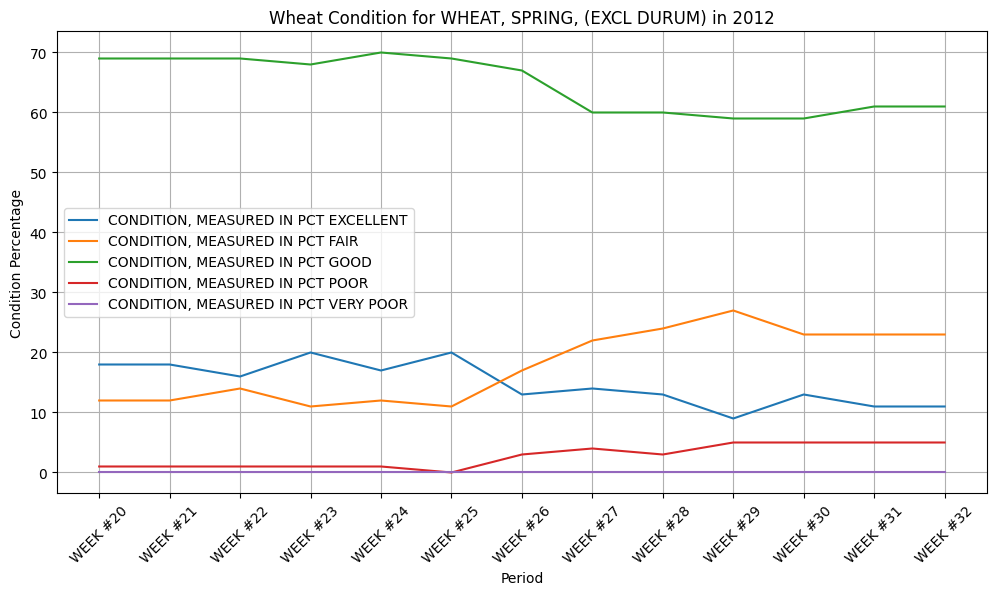

In [ ]:
# Plot the trends in wheat condition over time
plt.figure(figsize=(12, 6))
condition_columns = [
    'CONDITION, MEASURED IN PCT EXCELLENT',
    'CONDITION, MEASURED IN PCT FAIR',
    'CONDITION, MEASURED IN PCT GOOD',
    'CONDITION, MEASURED IN PCT POOR',
    'CONDITION, MEASURED IN PCT VERY POOR'
]

for column in condition_columns:
    plt.plot(filtered_data['Period'], filtered_data[column], label=column)

plt.xlabel('Period')
plt.ylabel('Condition Percentage')
plt.title(f'Wheat Condition for {target_season} in {target_year}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Weekly condition have started since 1986 -



condition is present only for weeks 20 to 32

<ipython-input-6-2ad3a0c43bb4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Week Number'] = filtered_df['Period'].apply(extract_week_number)


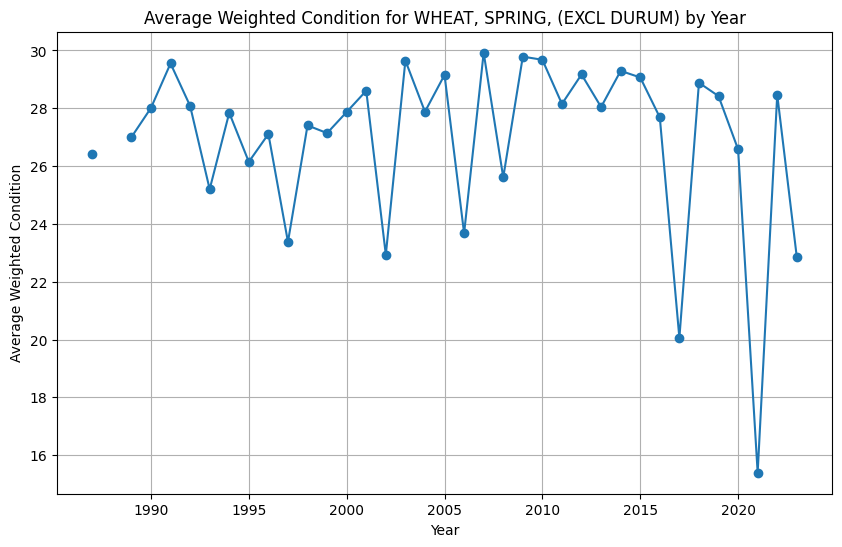

In [ ]:
def calculate_weighted_condition(df):
    # Define the weights for each condition category
    weights = {
        'CONDITION, MEASURED IN PCT EXCELLENT': 0.4,
        'CONDITION, MEASURED IN PCT GOOD': 0.3,
        'CONDITION, MEASURED IN PCT FAIR': 0.2,
        'CONDITION, MEASURED IN PCT POOR': 0.1
    }

    # Calculate the weighted condition for each row
    df['Weighted Condition'] = df[weights.keys()].dot(pd.Series(weights))

def filter_and_sort_data_multiple_years(df, target_season, target_years):
    # Filter the DataFrame based on the season and years
    filtered_df = df[(df['Season'] == target_season) & df['Year'].isin(target_years)]

    # Sort the DataFrame by "Period" using the extracted week numbers
    filtered_df['Week Number'] = filtered_df['Period'].apply(extract_week_number)
    filtered_df = filtered_df.sort_values(by=['Year', 'Week Number'])

    return filtered_df


# Specify the target season and years
target_season = 'WHEAT, SPRING, (EXCL DURUM)'
target_years = list(range(1986, 2024))  # Add the years you want to compare

# Filter and sort the data
filtered_data_2 = filter_and_sort_data_multiple_years(data, target_season, target_years)

# Calculate weighted condition for each row
calculate_weighted_condition(filtered_data_2)

# Calculate the average weighted condition for each year
average_condition_by_year = filtered_data_2.groupby('Year')['Weighted Condition'].mean()

# Plot the average weighted condition for each year
plt.figure(figsize=(10, 6))
plt.plot(average_condition_by_year.index, average_condition_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Weighted Condition')
plt.title(f'Average Weighted Condition for {target_season} by Year')
plt.grid(True)
plt.show()



```
# Ce texte est au format code
```

The dataset exhibits peaks and troughs, necessitating an analysis of the meteorological impact on specific years, namely **1993, 1995, 1997, 2002, 2006, 2008, 2017, and 2021**. For this analysis, the focus will be on the weeks ranging from **20 to 32**.

#Progress Analysis

The **progression** data is available for the weeks ranging from **week 13 to week 35**

In [ ]:
import matplotlib.pyplot as plt

def plot_progress_trends(data, target_year, target_season):
    # Filtrer les données pour l'année et la saison cibles
    filtered_data = data[(data['Year'] == target_year) & (data['Season'] == target_season)]

    # Plot the trends in wheat progress over time
    plt.figure(figsize=(12, 6))
    progress_columns = [
        'PROGRESS, MEASURED IN PCT COLORING',
        'PROGRESS, MEASURED IN PCT EMERGED',
        'PROGRESS, MEASURED IN PCT HARVESTED',
        'PROGRESS, MEASURED IN PCT HEADED',
        'PROGRESS, MEASURED IN PCT JOINTING',
        'PROGRESS, MEASURED IN PCT MATURE',
        'PROGRESS, MEASURED IN PCT PLANTED'
    ]

    for column in progress_columns:
        plt.plot(filtered_data['Period'], filtered_data[column], label=column)

    plt.xlabel('Period')
    plt.ylabel('Progress Percentage')
    plt.title(f'Wheat Progress for {target_season} in {target_year}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()




Records for 'WHEAT, SPRING, (EXCL DURUM)' are limited to the years between **1981 and 2023**

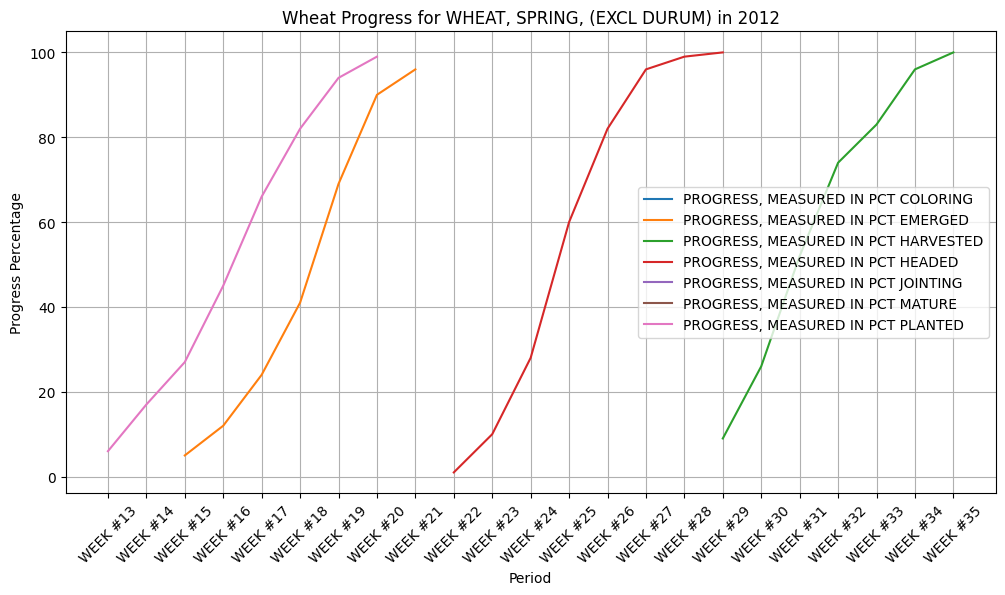

In [ ]:
# Définir l'année et la saison cibles
target_year = 2012
target_season = 'WHEAT, SPRING, (EXCL DURUM)'

# Tracer les tendances de la progression pour l'année et la saison cibles
plot_progress_trends(data, target_year, target_season)

Records for 'WHEAT, WINTER' are limited to the years between **2014 and 2024**

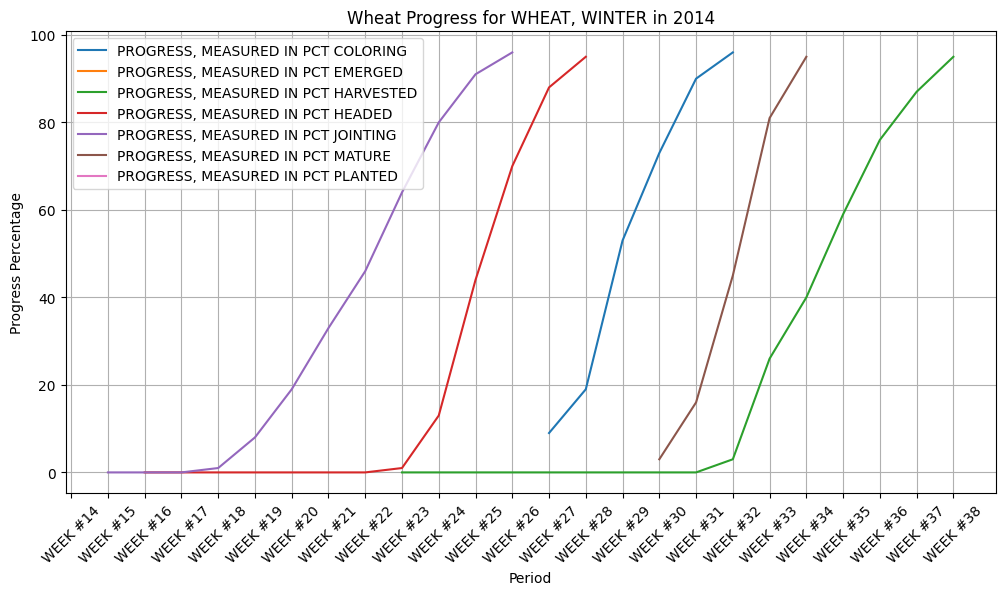

In [ ]:
# Définir l'année et la saison cibles
target_year = 2014
target_season = 'WHEAT, WINTER'

# Tracer les tendances de la progression pour l'année et la saison cibles
plot_progress_trends(data, target_year, target_season)

In [ ]:
data['Season'].unique()

array(['WHEAT, SPRING, (EXCL DURUM)', 'WHEAT, WINTER',
       'WHEAT, SPRING, DURUM'], dtype=object)

In [ ]:
## Y a un truc que je comprends pas, tu as 7 légendes mais que 5 courbes.
# PROGRESS, MEASURED IN PCT PLANTED est calculé depuis 2015 donc c'est normal qu'il n'aura pas de courbe. Emerged également

#Meteorological data

In [ ]:
df_meteo=pd.read_csv('weekly_meteorological_data_1990_2023.csv')

In [ ]:
df_meteo

,Year,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,Total Penman PET,Avg Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill,Period
0,1990,48.439,32.288,40.364,45.438,42.042,11.996,23.594,326.653,0.781,0.112,0.547,32.509,30.829,WEEK #16
1,1990,64.446,34.194,49.320,51.547,50.025,9.433,19.440,531.611,1.882,0.269,0.000,30.862,46.617,WEEK #17
2,1990,62.839,34.959,48.899,55.401,49.449,9.671,21.085,512.967,1.870,0.267,0.157,26.558,45.226,WEEK #18
3,1990,61.808,37.936,49.872,54.401,50.424,13.050,23.344,431.389,1.488,0.213,0.286,36.339,46.101,WEEK #19
4,1990,75.169,49.681,62.425,64.572,62.184,9.602,20.403,497.230,1.937,0.277,0.540,45.554,61.477,WEEK #20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,2023,73.171,52.563,62.867,62.383,61.441,5.552,19.363,245.291,0.822,0.117,0.030,55.431,62.019,WEEK #39
1745,2023,60.623,37.641,49.132,53.441,55.587,8.286,25.924,238.692,0.737,0.105,0.565,41.214,46.061,WEEK #40
1746,2023,57.380,32.501,44.941,49.996,49.011,6.049,19.470,257.373,0.645,0.092,0.000,35.735,42.605,WEEK #41
1747,2023,62.898,38.491,50.695,51.579,49.983,7.647,23.210,197.870,0.791,0.113,0.506,41.532,48.211,WEEK #42


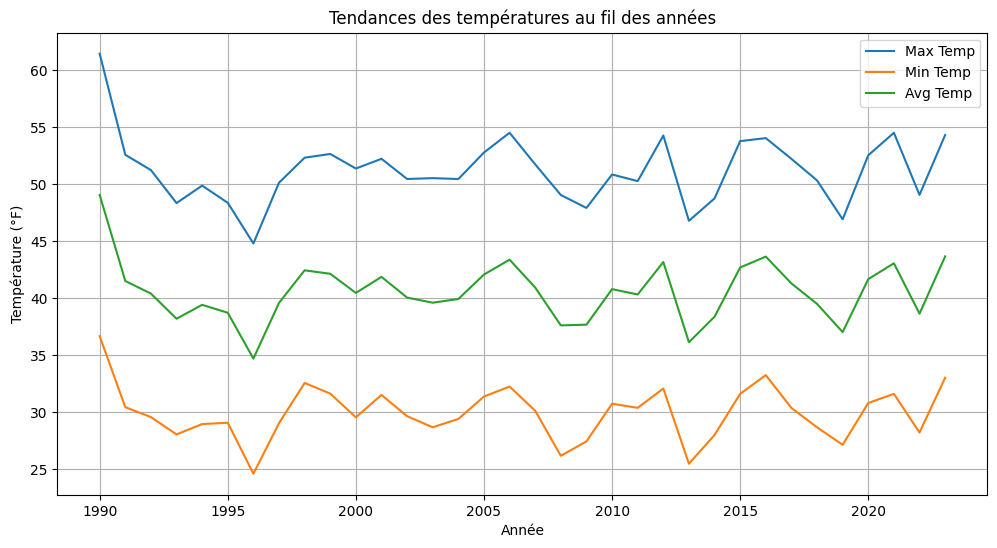

In [ ]:
import matplotlib.pyplot as plt


# Groupement par année et calcul de la moyenne des températures maximales, minimales et moyennes
yearly_data = df_meteo.groupby(df_meteo['Year'])[['Max Temp', 'Min Temp', 'Avg Temp']].mean()

# Tracer les tendances au fil des années
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['Max Temp'], label='Max Temp')
plt.plot(yearly_data.index, yearly_data['Min Temp'], label='Min Temp')
plt.plot(yearly_data.index, yearly_data['Avg Temp'], label='Avg Temp')

plt.xlabel('Année')
plt.ylabel('Température (°F)')
plt.title('Tendances des températures au fil des années')
plt.legend()
plt.grid(True)
plt.show()

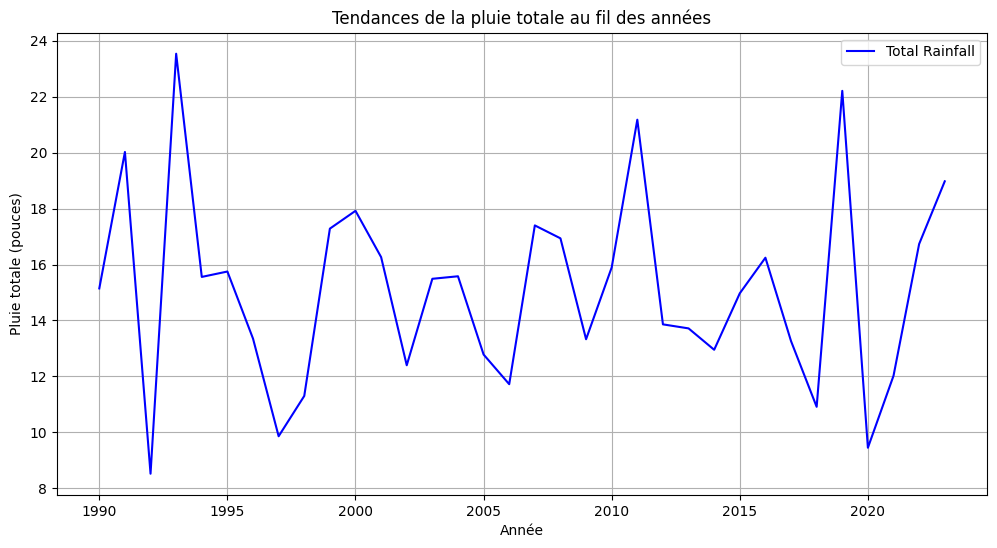

In [ ]:
# Groupement par année et calcul de la somme totale des précipitations
yearly_total_rainfall = df_meteo.groupby('Year')['Total Rainfall'].sum()

# Tracer les tendances au fil des années pour la pluie totale
plt.figure(figsize=(12, 6))
plt.plot(yearly_total_rainfall.index, yearly_total_rainfall, label='Total Rainfall', color='b')

plt.xlabel('Année')
plt.ylabel('Pluie totale (pouces)')
plt.title('Tendances de la pluie totale au fil des années')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
merged_data = pd.merge(data, df_meteo, on=['Year', 'Period'],how ='inner')


In [ ]:
merged_data

,Year,Period,Week Ending,Geo Level,State,Season,"CONDITION, MEASURED IN PCT EXCELLENT","CONDITION, MEASURED IN PCT FAIR","CONDITION, MEASURED IN PCT GOOD","CONDITION, MEASURED IN PCT POOR",...,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,Total Penman PET,Avg Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,1990,WEEK #16,1990-04-22,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,...,45.438,42.042,11.996,23.594,326.653,0.781,0.112,0.547,32.509,30.829
1,1990,WEEK #17,1990-04-29,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,...,51.547,50.025,9.433,19.440,531.611,1.882,0.269,0.000,30.862,46.617
2,1990,WEEK #18,1990-05-06,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,...,55.401,49.449,9.671,21.085,512.967,1.870,0.267,0.157,26.558,45.226
3,1990,WEEK #19,1990-05-13,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,...,54.401,50.424,13.050,23.344,431.389,1.488,0.213,0.286,36.339,46.101
4,1990,WEEK #20,1990-05-20,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",1.0,19.0,73.0,6.0,...,64.572,62.184,9.602,20.403,497.230,1.937,0.277,0.540,45.554,61.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2023,WEEK #41,2023-10-15,STATE,NORTH DAKOTA,"WHEAT, WINTER",3.0,28.0,61.0,6.0,...,49.996,49.011,6.049,19.470,257.373,0.645,0.092,0.000,35.735,42.605
1449,2023,WEEK #42,2022-10-23,STATE,NORTH DAKOTA,"WHEAT, WINTER",7.0,34.0,57.0,2.0,...,51.579,49.983,7.647,23.210,197.870,0.791,0.113,0.506,41.532,48.211
1450,2023,WEEK #42,2023-10-22,STATE,NORTH DAKOTA,"WHEAT, WINTER",3.0,35.0,55.0,6.0,...,51.579,49.983,7.647,23.210,197.870,0.791,0.113,0.506,41.532,48.211
1451,2023,WEEK #43,2022-10-30,STATE,NORTH DAKOTA,"WHEAT, WINTER",7.0,30.0,60.0,2.0,...,38.810,43.493,9.363,22.416,156.410,0.159,0.023,0.804,21.889,15.060


In [ ]:
merged_data.columns

Index(['Year', 'Period', 'Week Ending', 'Geo Level', 'State', 'Season',
       'CONDITION, MEASURED IN PCT EXCELLENT',
       'CONDITION, MEASURED IN PCT FAIR', 'CONDITION, MEASURED IN PCT GOOD',
       'CONDITION, MEASURED IN PCT POOR',
       'CONDITION, MEASURED IN PCT VERY POOR',
       'PROGRESS, MEASURED IN PCT COLORING',
       'PROGRESS, MEASURED IN PCT EMERGED',
       'PROGRESS, MEASURED IN PCT HARVESTED',
       'PROGRESS, MEASURED IN PCT HEADED',
       'PROGRESS, MEASURED IN PCT JOINTING',
       'PROGRESS, MEASURED IN PCT MATURE', 'PROGRESS, MEASURED IN PCT PLANTED',
       'Max Temp', 'Min Temp', 'Avg Temp', 'Avg Bare Soil Temp',
       'Avg Turf Soil Temp', 'Avg Wind Speed', 'Max Wind Speed',
       'Total Solar Rad', 'Total Penman PET', 'Avg Penman PET',
       'Total Rainfall', 'Avg Dew Point', 'Avg Wind Chill'],
      dtype='object')

In [ ]:
merged_data

,Year,Period,Week Ending,Geo Level,State,Season,"CONDITION, MEASURED IN PCT EXCELLENT","CONDITION, MEASURED IN PCT FAIR","CONDITION, MEASURED IN PCT GOOD","CONDITION, MEASURED IN PCT POOR",...,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,Total Penman PET,Avg Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,1990,WEEK #16,1990-04-22,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,...,45.438,42.042,11.996,23.594,326.653,0.781,0.112,0.547,32.509,30.829
1,1990,WEEK #17,1990-04-29,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,...,51.547,50.025,9.433,19.440,531.611,1.882,0.269,0.000,30.862,46.617
2,1990,WEEK #18,1990-05-06,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,...,55.401,49.449,9.671,21.085,512.967,1.870,0.267,0.157,26.558,45.226
3,1990,WEEK #19,1990-05-13,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",NaN,NaN,NaN,NaN,...,54.401,50.424,13.050,23.344,431.389,1.488,0.213,0.286,36.339,46.101
4,1990,WEEK #20,1990-05-20,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM)",1.0,19.0,73.0,6.0,...,64.572,62.184,9.602,20.403,497.230,1.937,0.277,0.540,45.554,61.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2023,WEEK #41,2023-10-15,STATE,NORTH DAKOTA,"WHEAT, WINTER",3.0,28.0,61.0,6.0,...,49.996,49.011,6.049,19.470,257.373,0.645,0.092,0.000,35.735,42.605
1449,2023,WEEK #42,2022-10-23,STATE,NORTH DAKOTA,"WHEAT, WINTER",7.0,34.0,57.0,2.0,...,51.579,49.983,7.647,23.210,197.870,0.791,0.113,0.506,41.532,48.211
1450,2023,WEEK #42,2023-10-22,STATE,NORTH DAKOTA,"WHEAT, WINTER",3.0,35.0,55.0,6.0,...,51.579,49.983,7.647,23.210,197.870,0.791,0.113,0.506,41.532,48.211
1451,2023,WEEK #43,2022-10-30,STATE,NORTH DAKOTA,"WHEAT, WINTER",7.0,30.0,60.0,2.0,...,38.810,43.493,9.363,22.416,156.410,0.159,0.023,0.804,21.889,15.060


In [ ]:
merged_data[merged_data['Season'] == 'WHEAT, SPRING, (EXCL DURUM)']['Period'].unique()

array(['WEEK #16', 'WEEK #17', 'WEEK #18', 'WEEK #19', 'WEEK #20',
       'WEEK #21', 'WEEK #22', 'WEEK #23', 'WEEK #24', 'WEEK #25',
       'WEEK #26', 'WEEK #27', 'WEEK #28', 'WEEK #29', 'WEEK #30',
       'WEEK #31', 'WEEK #32', 'WEEK #33', 'WEEK #34', 'WEEK #35',
       'WEEK #36', 'WEEK #14', 'WEEK #15', 'WEEK #37', 'WEEK #38',
       'WEEK #39', 'WEEK #40', 'WEEK #13', 'WEEK #41', 'WEEK #42'],
      dtype=object)

In [ ]:
selected_periods = ['WEEK #16', 'WEEK #17', 'WEEK #18', 'WEEK #19', 'WEEK #20',
       'WEEK #21', 'WEEK #22', 'WEEK #23', 'WEEK #24', 'WEEK #25',
       'WEEK #26', 'WEEK #27', 'WEEK #28', 'WEEK #29', 'WEEK #30',
       'WEEK #31', 'WEEK #32', 'WEEK #33', 'WEEK #34', 'WEEK #35',
       'WEEK #36', 'WEEK #14', 'WEEK #15', 'WEEK #37', 'WEEK #38',
       'WEEK #39', 'WEEK #40', 'WEEK #13', 'WEEK #41', 'WEEK #42']

merged_data = merged_data[merged_data['Season'] == 'WHEAT, SPRING, (EXCL DURUM)']



In [ ]:
from IPython.display import display
import ipywidgets as widgets

# Assuming you have a DataFrame named 'merged_data' with columns 'Year', 'Period', and 'Total Rainfall'

# Create a slider for the 'Year'
year_slider = widgets.IntSlider(
    value=merged_data['Year'].min(),
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:'
)

# Define a function to update the plot based on the selected year
def update_plot(selected_year):
    selected_data = merged_data[merged_data['Year'] == selected_year]

    plt.figure(figsize=(10, 6))
    plt.bar(selected_data['Period'], selected_data['Total Rainfall'], color='blue')
    plt.title(f'Total Rainfall for {selected_year}')
    plt.xlabel('Period')
    plt.ylabel('Total Rainfall (mm)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, selected_year=year_slider)

interactive(children=(IntSlider(value=1990, description='Year:', max=2023, min=1990), Output()), _dom_classes=…

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming you have a DataFrame named 'merged_data' with columns 'Year', 'Period', 'Total Rainfall', and 'Condition'

# Create a slider for the 'Year'
year_slider = widgets.IntSlider(
    value=merged_data['Year'].min(),
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:'
)

# Define a function to update the plot based on the selected year
def update_plot(selected_year):
    selected_data = merged_data[merged_data['Year'] == selected_year]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Total Rainfall on the first y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Period')
    ax1.set_ylabel('Total Rainfall (mm)', color=color)
    ax1.bar(selected_data['Period'], selected_data['Total Rainfall'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for 'Condition' in percentage
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('CONDITION, MEASURED IN PCT EXCELLENT', color=color)
    ax2.plot(selected_data['Period'], selected_data['CONDITION, MEASURED IN PCT EXCELLENT'] , color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.autofmt_xdate()

    plt.title(f'Total Rainfall and Condition for {selected_year}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, selected_year=year_slider)


interactive(children=(IntSlider(value=1990, description='Year:', max=2023, min=1990), Output()), _dom_classes=…

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming you have a DataFrame named 'merged_data' with columns 'Year', 'Period', 'Total Rainfall', and 'Condition'

# Create a slider for the 'Year'
year_slider = widgets.IntSlider(
    value=merged_data['Year'].min(),
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:'
)

# Define a function to update the plot based on the selected year
def update_plot(selected_year):
    selected_data = merged_data[merged_data['Year'] == selected_year]

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Total Rainfall on the first y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Period')
    ax1.set_ylabel('Total Rainfall (mm)', color=color)
    ax1.bar(selected_data['Period'], selected_data['Total Rainfall'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for 'Condition' in percentage
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('CONDITION, MEASURED IN PCT VERY POOR', color=color)
    ax2.plot(selected_data['Period'], selected_data['CONDITION, MEASURED IN PCT VERY POOR'] , color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.autofmt_xdate()

    plt.title(f'Total Rainfall and poor Condition for {selected_year}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, selected_year=year_slider)


interactive(children=(IntSlider(value=1990, description='Year:', max=2023, min=1990), Output()), _dom_classes=…

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming you have a DataFrame named 'merged_data' with columns 'Year', 'Period', 'Total Rainfall', and 'Condition'

# Create a slider for the 'Year'
year_slider = widgets.IntSlider(
    value=merged_data['Year'].min(),
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:'
)

# Define a function to update the plot based on the selected year
def update_plot(selected_year):
    selected_data = merged_data[merged_data['Year'] == selected_year]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Total Rainfall on the first y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Period')
    ax1.set_ylabel('Avg Temp', color=color)
    ax1.bar(selected_data['Period'], selected_data['Avg Temp'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for 'Condition' in percentage
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('CONDITION, MEASURED IN PCT EXCELLENT', color=color)
    ax2.plot(selected_data['Period'], selected_data['CONDITION, MEASURED IN PCT EXCELLENT'] , color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.autofmt_xdate()

    plt.title(f'Temperature and Condition for {selected_year}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, selected_year=year_slider)

interactive(children=(IntSlider(value=1990, description='Year:', max=2023, min=1990), Output()), _dom_classes=…

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Assume 'merged_data' is your DataFrame

# Extract relevant columns
columns_of_interest = ['Year', 'Period', 'State', 'Season','Avg Temp', 'CONDITION, MEASURED IN PCT EXCELLENT']
selected_data = merged_data[columns_of_interest]
merged_data.columns


Index(['Year', 'Period', 'Week Ending', 'Geo Level', 'State', 'Season',
       'CONDITION, MEASURED IN PCT EXCELLENT',
       'CONDITION, MEASURED IN PCT FAIR', 'CONDITION, MEASURED IN PCT GOOD',
       'CONDITION, MEASURED IN PCT POOR',
       'CONDITION, MEASURED IN PCT VERY POOR',
       'PROGRESS, MEASURED IN PCT COLORING',
       'PROGRESS, MEASURED IN PCT EMERGED',
       'PROGRESS, MEASURED IN PCT HARVESTED',
       'PROGRESS, MEASURED IN PCT HEADED',
       'PROGRESS, MEASURED IN PCT JOINTING',
       'PROGRESS, MEASURED IN PCT MATURE', 'PROGRESS, MEASURED IN PCT PLANTED',
       'Max Temp', 'Min Temp', 'Avg Temp', 'Avg Bare Soil Temp',
       'Avg Turf Soil Temp', 'Avg Wind Speed', 'Max Wind Speed',
       'Total Solar Rad', 'Total Penman PET', 'Avg Penman PET',
       'Total Rainfall', 'Avg Dew Point', 'Avg Wind Chill'],
      dtype='object')

In [ ]:
# Set the significance level
alpha = 0.05
for year, group_data in selected_data.groupby('Year'):
    print(f"Year: {year}")
    print(group_data)

Year: 1990
    Year    Period         State                       Season  Avg Temp  \
0   1990  WEEK #16  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    40.364   
1   1990  WEEK #17  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    49.320   
2   1990  WEEK #18  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    48.899   
3   1990  WEEK #19  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    49.872   
4   1990  WEEK #20  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    62.425   
5   1990  WEEK #21  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    59.551   
6   1990  WEEK #22  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    63.981   
7   1990  WEEK #23  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    61.980   
8   1990  WEEK #24  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    67.176   
9   1990  WEEK #25  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    74.150   
10  1990  WEEK #26  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    67.425   
11  1990  WEEK #27  NORTH DAKOTA  WHEAT, SPRING, (EXCL DURUM)    65.279   
12  1990  WEEK

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Assume 'merged_data' is your DataFrame

# Extract relevant columns
columns_of_interest = ['Year', 'Avg Temp', 'CONDITION, MEASURED IN PCT EXCELLENT']
selected_data = merged_data[columns_of_interest]

# Set the significance level
alpha = 0.05
selected_data.groupby('Year')
# Group by 'Year' and perform Granger causality test for each year
for year, year_data in selected_data.groupby('Year'):
    print(f"\nGranger Causality Test for Year {year}:\n")

    # Filter out rows with NaN values in the 'CONDITION, MEASURED IN PCT EXCELLENT' column
    year_data = year_data.dropna(subset=['CONDITION, MEASURED IN PCT EXCELLENT'])

    # Check if there are enough data points for the Granger causality test
    if len(year_data) > max_lag:
        max_lag = 3  # Adjust as needed
        test_result = grangercausalitytests(year_data[['Avg Temp', 'CONDITION, MEASURED IN PCT EXCELLENT']], max_lag, verbose=True)

        # Check the p-values for each lag
        for lag in range(1, max_lag + 1):
            p_value = test_result[lag][0]['ssr_chi2test'][1]
            if p_value < alpha:
                print(f"Lag {lag}: Significant (p-value = {p_value})")
            else:
                print(f"Lag {lag}: Not Significant (p-value = {p_value})")
    else:
        print(f"Not enough data points for Granger causality test in Year {year}")



Granger Causality Test for Year 1990:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2166  , p=0.6516  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.2816  , p=0.5957  , df=1
likelihood ratio test: chi2=0.2786  , p=0.5976  , df=1
parameter F test:         F=0.2166  , p=0.6516  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1694  , p=0.8475  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=0.5809  , p=0.7479  , df=2
likelihood ratio test: chi2=0.5672  , p=0.7531  , df=2
parameter F test:         F=0.1694  , p=0.8475  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3904  , p=0.7672  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=3.2204  , p=0.3589  , df=3
likelihood ratio test: chi2=2.8246  , p=0.4195  , df=3
parameter F test:         F=0.3904  , p=0.7672  , df_denom=4, df_num=3
Lag 1: Not Significant (p-value = 0.5956545477496159)
Lag 2: Not

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

ssr based F test:         F=0.7137  , p=0.5272  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=2.6168  , p=0.2702  , df=2
likelihood ratio test: chi2=2.3475  , p=0.3092  , df=2
parameter F test:         F=0.7137  , p=0.5272  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7015  , p=0.6111  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=7.0154  , p=0.0714  , df=3
likelihood ratio test: chi2=5.3153  , p=0.1501  , df=3
parameter F test:         F=0.7015  , p=0.6111  , df_denom=3, df_num=3
Lag 1: Not Significant (p-value = 0.4148136422592772)
Lag 2: Not Significant (p-value = 0.2702486792665777)
Lag 3: Not Significant (p-value = 0.07140908431944816)

Granger Causality Test for Year 1998:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4851  , p=0.5020  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.6306  , p=0.4271  , df=1
likelihood ratio test: chi2=0.6158  , p=0.4326  , df=1
parameter F test:  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

parameter F test:         F=1.0821  , p=0.3969  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9255  , p=0.5246  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=9.2551  , p=0.0261  , df=3
likelihood ratio test: chi2=6.5519  , p=0.0876  , df=3
parameter F test:         F=0.9255  , p=0.5246  , df_denom=3, df_num=3
Lag 1: Not Significant (p-value = 0.17523625572614376)
Lag 2: Not Significant (p-value = 0.1375409052510631)
Lag 3: Significant (p-value = 0.02608439723683272)

Granger Causality Test for Year 2006:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.1952 , p=0.0020  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=27.7684 , p=0.0000  , df=1
likelihood ratio test: chi2=13.8568 , p=0.0002  , df=1
parameter F test:         F=20.1952 , p=0.0020  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.0149  , p=0.0276  , df_denom=5, df_num=2
ssr based chi2 t

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

ssr based F test:         F=1.5097  , p=0.2850  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=5.1760  , p=0.0752  , df=2
likelihood ratio test: chi2=4.3033  , p=0.1163  , df=2
parameter F test:         F=1.5097  , p=0.2850  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2335  , p=0.4073  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=10.1763 , p=0.0171  , df=3
likelihood ratio test: chi2=7.2048  , p=0.0656  , df=3
parameter F test:         F=1.2335  , p=0.4073  , df_denom=4, df_num=3
Lag 1: Not Significant (p-value = 0.26567425827911034)
Lag 2: Not Significant (p-value = 0.0751710983972773)
Lag 3: Significant (p-value = 0.01712567936674721)

Granger Causality Test for Year 2014:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9299  , p=0.3556  , df_denom=11, df_num=1
ssr based chi2 test:   chi2=1.1835  , p=0.2766  , df=1
likelihood ratio test: chi2=1.1361  , p=0.2865  , df=1
parameter F test:     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

ssr based F test:         F=0.8462  , p=0.3816  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=1.1282  , p=0.2882  , df=1
likelihood ratio test: chi2=1.0783  , p=0.2991  , df=1
parameter F test:         F=0.8462  , p=0.3816  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1503  , p=0.1161  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=11.5510 , p=0.0031  , df=2
likelihood ratio test: chi2=7.8967  , p=0.0193  , df=2
parameter F test:         F=3.1503  , p=0.1161  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4013  , p=0.7635  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=4.0131  , p=0.2601  , df=3
likelihood ratio test: chi2=3.3741  , p=0.3375  , df=3
parameter F test:         F=0.4013  , p=0.7635  , df_denom=3, df_num=3
Lag 1: Not Significant (p-value = 0.2881555323548518)
Lag 2: Significant (p-value = 0.003102595649692343)
Lag 3: Not Significant (p-value = 0.2600515191

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality Test for Year 1990:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2166  , p=0.6516  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.2816  , p=0.5957  , df=1
likelihood ratio test: chi2=0.2786  , p=0.5976  , df=1
parameter F test:         F=0.2166  , p=0.6516  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1694  , p=0.8475  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=0.5809  , p=0.7479  , df=2
likelihood ratio test: chi2=0.5672  , p=0.7531  , df=2
parameter F test:         F=0.1694  , p=0.8475  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3904  , p=0.7672  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=3.2204  , p=0.3589  , df=3
likelihood ratio test: chi2=2.8246  , p=0.4195  , df=3
parameter F test:         F=0.3904  , p=0.7672  , df_denom=4, df_num=3

Granger Causality Test for Year 1991:


Granger Causality
numbe

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based chi2 test:   chi2=19.6902 , p=0.0002  , df=3
likelihood ratio test: chi2=11.9876 , p=0.0074  , df=3
parameter F test:         F=3.0293  , p=0.1151  , df_denom=6, df_num=3

Granger Causality Test for Year 1994:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3062  , p=0.2773  , df_denom=11, df_num=1
ssr based chi2 test:   chi2=1.6625  , p=0.1973  , df=1
likelihood ratio test: chi2=1.5709  , p=0.2101  , df=1
parameter F test:         F=1.3062  , p=0.2773  , df_denom=11, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0161  , p=0.9841  , df_denom=8, df_num=2
ssr based chi2 test:   chi2=0.0522  , p=0.9742  , df=2
likelihood ratio test: chi2=0.0521  , p=0.9743  , df=2
parameter F test:         F=0.0161  , p=0.9841  , df_denom=8, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5005  , p=0.6982  , df_denom=5, df_num=3
ssr based chi2 test:   chi2=3.6032  , p=0.3076  , df=3
likelihoo

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



ssr based chi2 test:   chi2=0.6306  , p=0.4271  , df=1
likelihood ratio test: chi2=0.6158  , p=0.4326  , df=1
parameter F test:         F=0.4851  , p=0.5020  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0562  , p=0.3973  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=3.6213  , p=0.1635  , df=2
likelihood ratio test: chi2=3.1648  , p=0.2055  , df=2
parameter F test:         F=1.0562  , p=0.3973  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2133  , p=0.8826  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=1.7593  , p=0.6238  , df=3
likelihood ratio test: chi2=1.6320  , p=0.6521  , df=3
parameter F test:         F=0.2133  , p=0.8826  , df_denom=4, df_num=3

Granger Causality Test for Year 1999:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3787  , p=0.0932  , df_denom=11, df_num=1
ssr based chi2 test:   chi2=4.3002  , p=0.0381  , df=1
likeliho

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4982  , p=0.5003  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=0.6850  , p=0.4079  , df=1
likelihood ratio test: chi2=0.6645  , p=0.4150  , df=1
parameter F test:         F=0.4982  , p=0.5003  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5621  , p=0.1714  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=10.2482 , p=0.0060  , df=2
likelihood ratio test: chi2=7.0548  , p=0.0294  , df=2
parameter F test:         F=2.5621  , p=0.1714  , df_denom=5, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4446  , p=0.7469  , df_denom=2, df_num=3
ssr based chi2 test:   chi2=6.0018  , p=0.1115  , df=3
likelihood ratio test: chi2=4.5985  , p=0.2037  , df=3
parameter F test:         F=0.4446  , p=0.7469  , df_denom=2, df_num=3

Granger Causality Test for Year 2004:


Granger Causality
number of lags (no zero) 1
ssr based F test:   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul


number of lags (no zero) 2
ssr based F test:         F=2.5106  , p=0.1507  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=8.6079  , p=0.0135  , df=2
likelihood ratio test: chi2=6.4892  , p=0.0390  , df=2
parameter F test:         F=2.5106  , p=0.1507  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4769  , p=0.7154  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=3.9344  , p=0.2686  , df=3
likelihood ratio test: chi2=3.3635  , p=0.3389  , df=3
parameter F test:         F=0.4769  , p=0.7154  , df_denom=4, df_num=3

Granger Causality Test for Year 2011:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6100  , p=0.4573  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=0.8387  , p=0.3598  , df=1
likelihood ratio test: chi2=0.8083  , p=0.3686  , df=1
parameter F test:         F=0.6100  , p=0.4573  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4303  , 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

ssr based F test:         F=0.0643  , p=0.8062  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=0.0885  , p=0.7661  , df=1
likelihood ratio test: chi2=0.0881  , p=0.7666  , df=1
parameter F test:         F=0.0643  , p=0.8062  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7718  , p=0.5104  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=3.0872  , p=0.2136  , df=2
likelihood ratio test: chi2=2.6905  , p=0.2605  , df=2
parameter F test:         F=0.7718  , p=0.5104  , df_denom=5, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8558  , p=0.3690  , df_denom=2, df_num=3
ssr based chi2 test:   chi2=25.0538 , p=0.0000  , df=3
likelihood ratio test: chi2=11.9764 , p=0.0075  , df=3
parameter F test:         F=1.8558  , p=0.3690  , df_denom=2, df_num=3

Granger Causality Test for Year 2019:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0157  , p=0.9027  , df_denom=10, df_

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


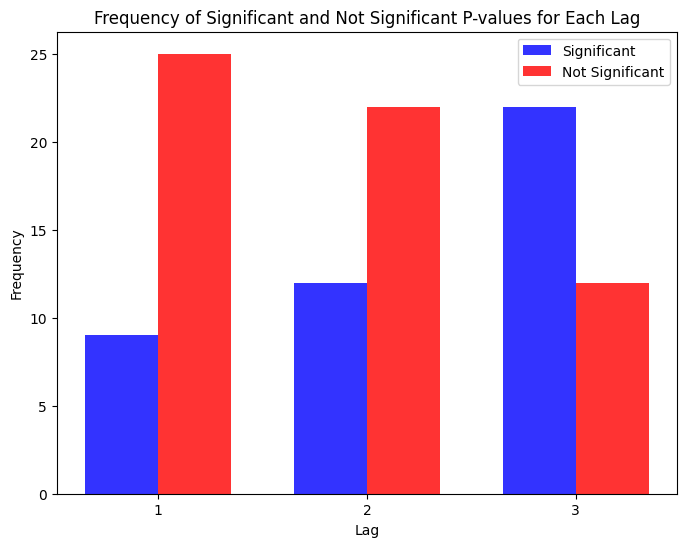

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Assume 'merged_data' is your DataFrame

# Extract relevant columns
columns_of_interest = ['Year', 'Avg Temp', 'CONDITION, MEASURED IN PCT EXCELLENT']
selected_data = merged_data[columns_of_interest]

# Set the significance level
alpha = 0.05

# Collect results for each lag across all years
lag_results = {'Lag': [], 'Significant': [], 'Not Significant': []}

# Group by 'Year' and perform Granger causality test for each year
for year, year_data in selected_data.groupby('Year'):
    print(f"\nGranger Causality Test for Year {year}:\n")

    # Filter out rows with NaN values in the 'CONDITION, MEASURED IN PCT EXCELLENT' column
    year_data = year_data.dropna(subset=['CONDITION, MEASURED IN PCT EXCELLENT'])

    # Check if there are enough data points for the Granger causality test
    if len(year_data) > max_lag:
        max_lag = 3  # Adjust as needed
        test_result = grangercausalitytests(year_data[['Avg Temp', 'CONDITION, MEASURED IN PCT EXCELLENT']], max_lag, verbose=True)

        # Collect results for each lag
        for lag in range(1, max_lag + 1):
            p_value = test_result[lag][0]['ssr_chi2test'][1]
            if p_value < alpha:
                lag_results['Lag'].append(lag)
                lag_results['Significant'].append(1)
                lag_results['Not Significant'].append(0)
            else:
                lag_results['Lag'].append(lag)
                lag_results['Significant'].append(0)
                lag_results['Not Significant'].append(1)
    else:
        print(f"Not enough data points for Granger causality test in Year {year}")

# Create a DataFrame from the collected results
lag_results_df = pd.DataFrame(lag_results)

# Group by 'Lag' and calculate the frequency of significant and not significant p-values
frequency_df = lag_results_df.groupby('Lag').agg({'Significant': 'sum', 'Not Significant': 'sum'}).reset_index()

# Plot a bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8

plt.bar(frequency_df['Lag'], frequency_df['Significant'], bar_width, alpha=opacity, color='b', label='Significant')
plt.bar(frequency_df['Lag'] + bar_width, frequency_df['Not Significant'], bar_width, alpha=opacity, color='r', label='Not Significant')

plt.xlabel('Lag')
plt.ylabel('Frequency')
plt.title('Frequency of Significant and Not Significant P-values for Each Lag')
plt.xticks(frequency_df['Lag'] + bar_width / 2, frequency_df['Lag'])
plt.legend()

plt.show()



Granger Causality Test for Year 1990:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9861  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9838  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9838  , df=1
parameter F test:         F=0.0003  , p=0.9861  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8656  , p=0.1233  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=9.8249  , p=0.0074  , df=2
likelihood ratio test: chi2=7.1777  , p=0.0276  , df=2
parameter F test:         F=2.8656  , p=0.1233  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9970  , p=0.2568  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=16.4755 , p=0.0009  , df=3
likelihood ratio test: chi2=10.0694 , p=0.0180  , df=3
parameter F test:         F=1.9970  , p=0.2568  , df_denom=4, df_num=3

Granger Causality Test for Year 1991:


Granger Causality
numbe

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

ssr based F test:         F=0.0002  , p=0.9998  , df_denom=8, df_num=2
ssr based chi2 test:   chi2=0.0007  , p=0.9997  , df=2
likelihood ratio test: chi2=0.0007  , p=0.9997  , df=2
parameter F test:         F=0.0002  , p=0.9998  , df_denom=8, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.1451  , p=0.0548  , df_denom=5, df_num=3
ssr based chi2 test:   chi2=37.0450 , p=0.0000  , df=3
likelihood ratio test: chi2=16.8940 , p=0.0007  , df=3
parameter F test:         F=5.1451  , p=0.0548  , df_denom=5, df_num=3

Granger Causality Test for Year 2000:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4287  , p=0.5274  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.5573  , p=0.4554  , df=1
likelihood ratio test: chi2=0.5457  , p=0.4601  , df=1
parameter F test:         F=0.4287  , p=0.5274  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.5539 , p=0.0061  , df_denom=7, df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul



Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8033  , p=0.2335  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=6.1828  , p=0.0454  , df=2
likelihood ratio test: chi2=4.9868  , p=0.0826  , df=2
parameter F test:         F=1.8033  , p=0.2335  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8999  , p=0.5151  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=7.4245  , p=0.0595  , df=3
likelihood ratio test: chi2=5.6737  , p=0.1286  , df=3
parameter F test:         F=0.8999  , p=0.5151  , df_denom=4, df_num=3

Granger Causality Test for Year 2009:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0006  , p=0.9803  , df_denom=11, df_num=1
ssr based chi2 test:   chi2=0.0008  , p=0.9772  , df=1
likelihood ratio test: chi2=0.0008  , p=0.9772  , df=1
parameter F test:         F=0.0006  , p=0.9803  , df_denom=11, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

parameter F test:         F=0.2623  , p=0.7776  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.4086  , p=0.0569  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=84.0859 , p=0.0000  , df=3
likelihood ratio test: chi2=22.4162 , p=0.0001  , df=3
parameter F test:         F=8.4086  , p=0.0569  , df_denom=3, df_num=3

Granger Causality Test for Year 2018:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0282  , p=0.8708  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=0.0388  , p=0.8439  , df=1
likelihood ratio test: chi2=0.0387  , p=0.8441  , df=1
parameter F test:         F=0.0282  , p=0.8708  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0670  , p=0.9360  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=0.2680  , p=0.8746  , df=2
likelihood ratio test: chi2=0.2644  , p=0.8762  , df=2
parameter F test:         F=0.0670  , p=0.9360  , df_denom=5, df_n

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

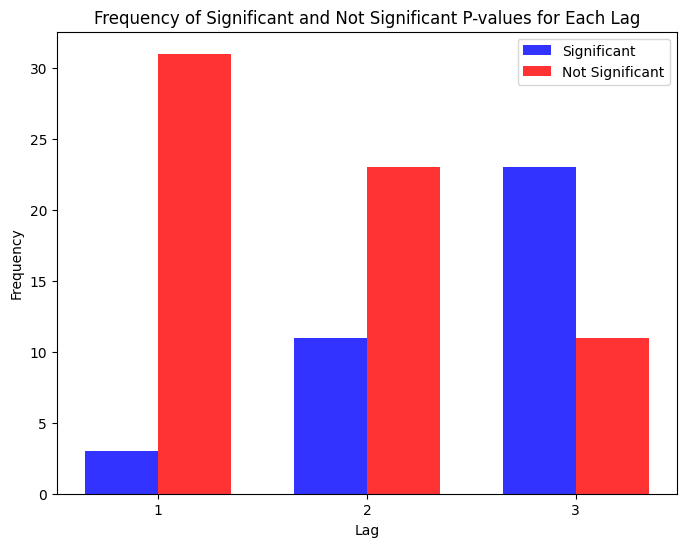

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Assume 'merged_data' is your DataFrame

# Extract relevant columns
columns_of_interest = ['Year', 'Total Rainfall', 'CONDITION, MEASURED IN PCT EXCELLENT']
selected_data = merged_data[columns_of_interest]

# Set the significance level
alpha = 0.05

# Collect results for each lag across all years
lag_results = {'Lag': [], 'Significant': [], 'Not Significant': []}

# Group by 'Year' and perform Granger causality test for each year
for year, year_data in selected_data.groupby('Year'):
    print(f"\nGranger Causality Test for Year {year}:\n")

    # Filter out rows with NaN values in the 'CONDITION, MEASURED IN PCT EXCELLENT' column
    year_data = year_data.dropna(subset=['CONDITION, MEASURED IN PCT EXCELLENT'])

    # Check if there are enough data points for the Granger causality test
    if len(year_data) > max_lag:
        max_lag = 3  # Adjust as needed
        test_result = grangercausalitytests(year_data[['Total Rainfall', 'CONDITION, MEASURED IN PCT EXCELLENT']], max_lag, verbose=True)

        # Collect results for each lag
        for lag in range(1, max_lag + 1):
            p_value = test_result[lag][0]['ssr_chi2test'][1]
            if p_value < alpha:
                lag_results['Lag'].append(lag)
                lag_results['Significant'].append(1)
                lag_results['Not Significant'].append(0)
            else:
                lag_results['Lag'].append(lag)
                lag_results['Significant'].append(0)
                lag_results['Not Significant'].append(1)
    else:
        print(f"Not enough data points for Granger causality test in Year {year}")

# Create a DataFrame from the collected results
lag_results_df = pd.DataFrame(lag_results)

# Group by 'Lag' and calculate the frequency of significant and not significant p-values
frequency_df = lag_results_df.groupby('Lag').agg({'Significant': 'sum', 'Not Significant': 'sum'}).reset_index()

# Plot a bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8

plt.bar(frequency_df['Lag'], frequency_df['Significant'], bar_width, alpha=opacity, color='b', label='Significant')
plt.bar(frequency_df['Lag'] + bar_width, frequency_df['Not Significant'], bar_width, alpha=opacity, color='r', label='Not Significant')

plt.xlabel('Lag')
plt.ylabel('Frequency')
plt.title('Frequency of Significant and Not Significant P-values for Each Lag')
plt.xticks(frequency_df['Lag'] + bar_width / 2, frequency_df['Lag'])
plt.legend()

plt.show()


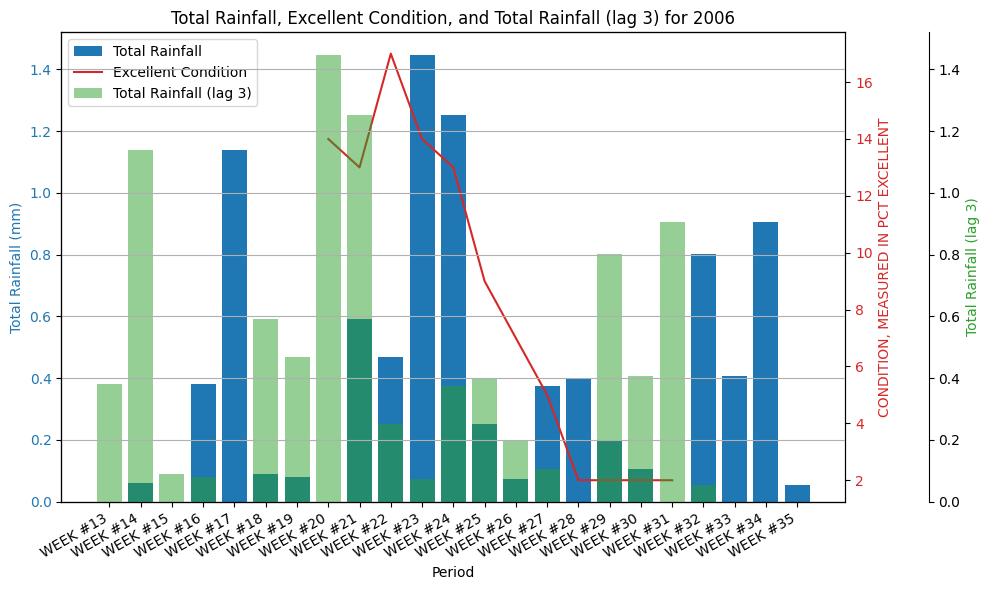

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming you have a DataFrame named 'merged_data' with columns 'Year', 'Period', 'Total Rainfall', and 'CONDITION, MEASURED IN PCT EXCELLENT'

# Create a slider for the 'Year'
year_slider = widgets.IntSlider(
    value=merged_data['Year'].min(),
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:'
)

# Define a function to update the plot based on the selected year
def update_plot(selected_year):
    selected_data = merged_data[merged_data['Year'] == selected_year]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Total Rainfall on the first y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Period')
    ax1.set_ylabel('Total Rainfall (mm)', color=color)
    ax1.bar(selected_data['Period'], selected_data['Total Rainfall'], color=color, label='Total Rainfall')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for 'Condition' in percentage
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('CONDITION, MEASURED IN PCT EXCELLENT', color=color)
    ax2.plot(selected_data['Period'], selected_data['CONDITION, MEASURED IN PCT EXCELLENT'], color=color, label='Excellent Condition')
    ax2.tick_params(axis='y', labelcolor=color)

    # Add lagged Total Rainfall
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    color = 'tab:green'
    ax3.set_ylabel('Total Rainfall (lag 3)', color=color)
    ax3.bar(selected_data['Period'][:-3], selected_data['Total Rainfall'].shift(-3).iloc[:-3], color=color, alpha=0.5, label='Total Rainfall (lag 3)')

    # Set legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

    fig.autofmt_xdate()
    plt.title(f'Total Rainfall, Excellent Condition, and Total Rainfall (lag 3) for {selected_year}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, selected_year=year_slider)



Granger Causality Test for Year 1990:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9861  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9838  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9838  , df=1
parameter F test:         F=0.0003  , p=0.9861  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8656  , p=0.1233  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=9.8249  , p=0.0074  , df=2
likelihood ratio test: chi2=7.1777  , p=0.0276  , df=2
parameter F test:         F=2.8656  , p=0.1233  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9970  , p=0.2568  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=16.4755 , p=0.0009  , df=3
likelihood ratio test: chi2=10.0694 , p=0.0180  , df=3
parameter F test:         F=1.9970  , p=0.2568  , df_denom=4, df_num=3

Granger Causality Test for Year 1991:


Granger Causality
numbe

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



parameter F test:         F=0.5052  , p=0.6954  , df_denom=5, df_num=3

Granger Causality Test for Year 1995:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2891  , p=0.6038  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.3854  , p=0.5347  , df=1
likelihood ratio test: chi2=0.3794  , p=0.5379  , df=1
parameter F test:         F=0.2891  , p=0.6038  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1852  , p=0.8355  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=0.6791  , p=0.7121  , df=2
likelihood ratio test: chi2=0.6590  , p=0.7193  , df=2
parameter F test:         F=0.1852  , p=0.8355  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2997  , p=0.8256  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=2.9967  , p=0.3921  , df=3
likelihood ratio test: chi2=2.6211  , p=0.4538  , df=3
parameter F test:         F=0.2997  , p=0.8256  , df_denom=3, df_

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



ssr based chi2 test:   chi2=31.4065 , p=0.0000  , df=3
likelihood ratio test: chi2=14.2085 , p=0.0026  , df=3
parameter F test:         F=3.1407  , p=0.1862  , df_denom=3, df_num=3

Granger Causality Test for Year 1998:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0017  , p=0.9678  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=0.0022  , p=0.9623  , df=1
likelihood ratio test: chi2=0.0022  , p=0.9623  , df=1
parameter F test:         F=0.0017  , p=0.9678  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9139  , p=0.4440  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=3.1332  , p=0.2087  , df=2
likelihood ratio test: chi2=2.7838  , p=0.2486  , df=2
parameter F test:         F=0.9139  , p=0.4440  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9411  , p=0.4998  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=7.7643  , p=0.0511  , df=3
likeliho

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul


ssr based chi2 test:   chi2=25.1695 , p=0.0000  , df=3
likelihood ratio test: chi2=12.0070 , p=0.0074  , df=3
parameter F test:         F=1.8644  , p=0.3678  , df_denom=2, df_num=3

Granger Causality Test for Year 2003:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7916  , p=0.3996  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=1.0884  , p=0.2968  , df=1
likelihood ratio test: chi2=1.0379  , p=0.3083  , df=1
parameter F test:         F=0.7916  , p=0.3996  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0183  , p=0.2277  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=8.0732  , p=0.0177  , df=2
likelihood ratio test: chi2=5.9184  , p=0.0519  , df=2
parameter F test:         F=2.0183  , p=0.2277  , df_denom=5, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9470  , p=0.3571  , df_denom=2, df_num=3
ssr based chi2 test:   chi2=26.2850 , p=0.0000  , df=3
likelihood

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=2.7785  , p=0.2118  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=27.7848 , p=0.0000  , df=3
likelihood ratio test: chi2=13.2932 , p=0.0040  , df=3
parameter F test:         F=2.7785  , p=0.2118  , df_denom=3, df_num=3

Granger Causality Test for Year 2006:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9692  , p=0.0297  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=9.5826  , p=0.0020  , df=1
likelihood ratio test: chi2=6.8921  , p=0.0087  , df=1
parameter F test:         F=6.9692  , p=0.0297  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1895  , p=0.0854  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=16.7580 , p=0.0002  , df=2
likelihood ratio test: chi2=9.8425  , p=0.0073  , df=2
parameter F test:         F=4.1895  , p=0.0854  , df_denom=5, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.5447 , p=0.0879  , df_denom=2, df_n

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0006  , p=0.9803  , df_denom=11, df_num=1
ssr based chi2 test:   chi2=0.0008  , p=0.9772  , df=1
likelihood ratio test: chi2=0.0008  , p=0.9772  , df=1
parameter F test:         F=0.0006  , p=0.9803  , df_denom=11, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7544  , p=0.2335  , df_denom=8, df_num=2
ssr based chi2 test:   chi2=5.7018  , p=0.0578  , df=2
likelihood ratio test: chi2=4.7277  , p=0.0941  , df=2
parameter F test:         F=1.7544  , p=0.2335  , df_denom=8, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9478  , p=0.4842  , df_denom=5, df_num=3
ssr based chi2 test:   chi2=6.8243  , p=0.0777  , df=3
likelihood ratio test: chi2=5.4029  , p=0.1446  , df=3
parameter F test:         F=0.9478  , p=0.4842  , df_denom=5, df_num=3

Granger Causality Test for Year 2010:


Granger Causality
number of lags (no zero) 1
ssr based F test: 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0075  , p=0.3392  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=1.3097  , p=0.2524  , df=1
likelihood ratio test: chi2=1.2478  , p=0.2640  , df=1
parameter F test:         F=1.0075  , p=0.3392  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.0323 , p=0.0088  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=34.3966 , p=0.0000  , df=2
likelihood ratio test: chi2=16.2278 , p=0.0003  , df=2
parameter F test:         F=10.0323 , p=0.0088  , df_denom=7, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4544  , p=0.1311  , df_denom=4, df_num=3
ssr based chi2 test:   chi2=28.4988 , p=0.0000  , df=3
likelihood ratio test: chi2=14.0621 , p=0.0028  , df=3
parameter F test:         F=3.4544  , p=0.1311  , df_denom=4, df_num=3

Granger Causality Test for Year 2014:


Granger Causality
number of lags (no zero) 1
ssr based F test: 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3242  , p=0.5830  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.4322  , p=0.5109  , df=1
likelihood ratio test: chi2=0.4246  , p=0.5146  , df=1
parameter F test:         F=0.3242  , p=0.5830  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2623  , p=0.7776  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=0.9619  , p=0.6182  , df=2
likelihood ratio test: chi2=0.9221  , p=0.6306  , df=2
parameter F test:         F=0.2623  , p=0.7776  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.4086  , p=0.0569  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=84.0859 , p=0.0000  , df=3
likelihood ratio test: chi2=22.4162 , p=0.0001  , df=3
parameter F test:         F=8.4086  , p=0.0569  , df_denom=3, df_num=3

Granger Causality Test for Year 2018:


Granger Causality
number of lags (no zero) 1
ssr based F test:   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2646  , p=0.6194  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.3528  , p=0.5525  , df=1
likelihood ratio test: chi2=0.3477  , p=0.5554  , df=1
parameter F test:         F=0.2646  , p=0.6194  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5634  , p=0.1568  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=9.3993  , p=0.0091  , df=2
likelihood ratio test: chi2=6.7936  , p=0.0335  , df=2
parameter F test:         F=2.5634  , p=0.1568  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=14.8482 , p=0.0264  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=148.4820, p=0.0000  , df=3
likelihood ratio test: chi2=27.6306 , p=0.0000  , df=3
parameter F test:         F=14.8482 , p=0.0264  , df_denom=3, df_num=3

Granger Causality Test for Year 2022:


Granger Causality
number of lags (no zero) 1
ssr based F test:   

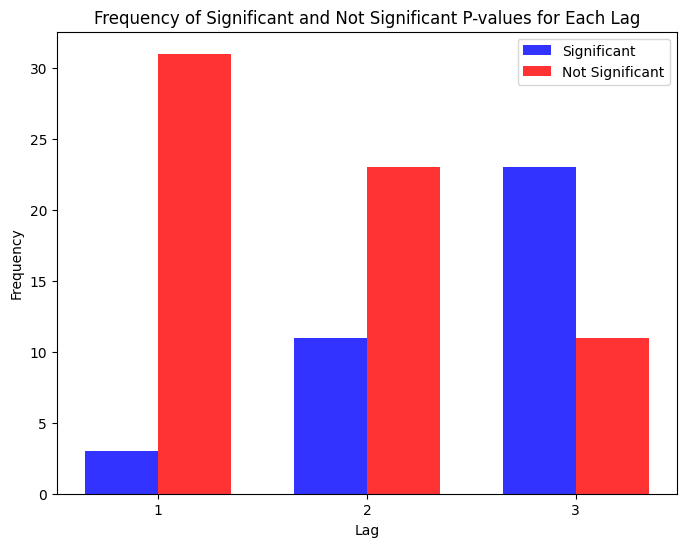

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Assume 'merged_data' is your DataFrame

# Extract relevant columns
columns_of_interest = ['Year', 'Total Rainfall', 'CONDITION, MEASURED IN PCT EXCELLENT']
selected_data = merged_data[columns_of_interest]

# Set the significance level
alpha = 0.05

# Set the maximum lag
max_lag = 3  # Adjust as needed

# Collect results for each lag across all years
lag_results = {'Lag': [], 'Significant': [], 'Not Significant': []}

# Group by 'Year' and perform Granger causality test for each year
for year, year_data in selected_data.groupby('Year'):
    print(f"\nGranger Causality Test for Year {year}:\n")

    # Filter out rows with NaN values in the 'CONDITION, MEASURED IN PCT EXCELLENT' column
    year_data = year_data.dropna(subset=['CONDITION, MEASURED IN PCT EXCELLENT'])

    # Check if there are enough data points for the Granger causality test
    if len(year_data) > max_lag:
        test_result = grangercausalitytests(year_data[['Total Rainfall', 'CONDITION, MEASURED IN PCT EXCELLENT']], max_lag, verbose=True)

        # Collect results for each lag
        for lag in range(1, max_lag + 1):
            p_value = test_result[lag][0]['ssr_chi2test'][1]
            if p_value < alpha:
                lag_results['Lag'].append(lag)
                lag_results['Significant'].append(1)
                lag_results['Not Significant'].append(0)
            else:
                lag_results['Lag'].append(lag)
                lag_results['Significant'].append(0)
                lag_results['Not Significant'].append(1)
    else:
        print(f"Not enough data points for Granger causality test in Year {year}")

# Create a DataFrame from the collected results
lag_results_df = pd.DataFrame(lag_results)

# Group by 'Lag' and calculate the frequency of significant and not significant p-values
frequency_df = lag_results_df.groupby('Lag').agg({'Significant': 'sum', 'Not Significant': 'sum'}).reset_index()

# Plot a bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8

plt.bar(frequency_df['Lag'], frequency_df['Significant'], bar_width, alpha=opacity, color='b', label='Significant')
plt.bar(frequency_df['Lag'] + bar_width, frequency_df['Not Significant'], bar_width, alpha=opacity, color='r', label='Not Significant')

plt.xlabel('Lag')
plt.ylabel('Frequency')
plt.title('Frequency of Significant and Not Significant P-values for Each Lag')
plt.xticks(frequency_df['Lag'] + bar_width / 2, frequency_df['Lag'])
plt.legend()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming you have a DataFrame named 'merged_data' with columns 'Year', 'Period', 'Total Rainfall', and 'CONDITION, MEASURED IN PCT EXCELLENT'

# Create a slider for the 'Year'
year_slider = widgets.IntSlider(
    value=merged_data['Year'].min(),
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:'
)

# Define a function to update the plot based on the selected year
def update_plot(selected_year):
    selected_data = merged_data[merged_data['Year'] == selected_year]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Total Rainfall on the first y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Period')
    ax1.set_ylabel('Total Rainfall (mm)', color=color)
    ax1.bar(selected_data['Period'], selected_data['Total Rainfall'], color=color, label='Total Rainfall')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for 'Condition' in percentage
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('CONDITION, MEASURED IN PCT EXCELLENT', color=color)
    ax2.plot(selected_data['Period'], selected_data['CONDITION, MEASURED IN PCT EXCELLENT'], color=color, label='Excellent Condition')
    ax2.tick_params(axis='y', labelcolor=color)

    # Add lagged Total Rainfall on the right side by shifting it to advance in time
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    color = 'tab:green'
    ax3.set_ylabel('Total Rainfall (lag 3)', color=color)
    ax3.bar(selected_data['Period'][:-3], selected_data['Total Rainfall'].shift(3).iloc[:-3], color=color, alpha=0.5, label='Total Rainfall (lag 3)')

    # Set legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

    fig.autofmt_xdate()
    plt.title(f'Total Rainfall, Excellent Condition, and Total Rainfall (lag 3) for {selected_year}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, selected_year=year_slider)


interactive(children=(IntSlider(value=1990, description='Year:', max=2023, min=1990), Output()), _dom_classes=…

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming you have a DataFrame named 'merged_data' with columns 'Year', 'Period', 'Total Rainfall', and 'CONDITION, MEASURED IN PCT EXCELLENT'

# Create a slider for the 'Year'
year_slider = widgets.IntSlider(
    value=merged_data['Year'].min(),
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:'
)

# Define a function to update the plot based on the selected year
def update_plot(selected_year):
    selected_data = merged_data[merged_data['Year'] == selected_year]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Total Rainfall on the first y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Period')
    ax1.set_ylabel('Total Rainfall (mm)', color=color)
    ax1.bar(selected_data['Period'], selected_data['Total Rainfall'], color=color, label='Total Rainfall')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for 'Condition' in percentage
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('CONDITION, MEASURED IN PCT EXCELLENT', color=color)
    ax2.plot(selected_data['Period'], selected_data['CONDITION, MEASURED IN PCT EXCELLENT'], color=color, label='Excellent Condition')
    ax2.tick_params(axis='y', labelcolor=color)

    # Add lagged Total Rainfall on the right side by shifting it to advance in time
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    color = 'tab:green'
    ax3.set_ylabel('Total Rainfall (lag 2)', color=color)
    ax3.bar(selected_data['Period'][:-2], selected_data['Total Rainfall'].shift(2).iloc[:-2], color=color, alpha=0.5, label='Total Rainfall (lag 2)')

    # Set legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

    fig.autofmt_xdate()
    plt.title(f'Total Rainfall, Excellent Condition, and Total Rainfall (lag 2) for {selected_year}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, selected_year=year_slider)


interactive(children=(IntSlider(value=1990, description='Year:', max=2023, min=1990), Output()), _dom_classes=…

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming you have a DataFrame named 'merged_data' with columns 'Year', 'Period', 'Total Rainfall', and 'CONDITION, MEASURED IN PCT EXCELLENT'

# Create a slider for the 'Year'
year_slider = widgets.IntSlider(
    value=merged_data['Year'].min(),
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:'
)

# Define a function to update the plot based on the selected year
def update_plot(selected_year):
    selected_data = merged_data[merged_data['Year'] == selected_year]

    # Calculate correlation with lag of 2
    correlation = selected_data['Total Rainfall'].shift(1).corr(selected_data['CONDITION, MEASURED IN PCT EXCELLENT'])

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Total Rainfall on the first y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Period')
    ax1.set_ylabel('Total Rainfall (mm)', color=color)
    ax1.bar(selected_data['Period'], selected_data['Total Rainfall'], color=color, label='Total Rainfall')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for 'Condition' in percentage
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('CONDITION, MEASURED IN PCT EXCELLENT', color=color)
    ax2.plot(selected_data['Period'], selected_data['CONDITION, MEASURED IN PCT EXCELLENT'], color=color, label='Excellent Condition')
    ax2.tick_params(axis='y', labelcolor=color)

    # Add lagged Total Rainfall on the right side by shifting it to advance in time
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    color = 'tab:green'
    ax3.set_ylabel('Total Rainfall (lag 1)', color=color)
    ax3.bar(selected_data['Period'][:-1], selected_data['Total Rainfall'].shift(1).iloc[:-1], color=color, alpha=0.5, label='Total Rainfall (lag 1)')

    # Set legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

    fig.autofmt_xdate()
    plt.title(f'Total Rainfall, Excellent Condition, and Total Rainfall (lag 1) for {selected_year}\nCorrelation with lag 1: {correlation:.2f}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, selected_year=year_slider)


interactive(children=(IntSlider(value=1990, description='Year:', max=2023, min=1990), Output()), _dom_classes=…